Nama: Ryan Badai Alamsyah

Dataset: https://www.kaggle.com/datasets/mokar2001/house-price-tehran-iran/data

# Data Collection

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
df = pd.read_csv("housePrice.csv")
df_org = df.copy()
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


# Data Understanding

In [5]:
df.shape

(3479, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [7]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


# Exploratory Data Analysis

### Missing Value pada Dataset

In [8]:
# Mencari Missing Value
df.isna().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [9]:
# Membersihkan Missing Value
df.dropna(subset=["Address"], inplace=True)

In [10]:
df.isna().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [11]:
df.shape

(3456, 8)

In [12]:
df['Parking'].value_counts(normalize = True)*100

True     84.751157
False    15.248843
Name: Parking, dtype: float64

In [13]:
pd.crosstab(df['Parking'],df['Room'])

Room,0,1,2,3,4,5
Parking,,,,,,
False,8,243,244,26,1,5
True,2,426,1699,705,69,28


### Mengelompokkan Dataset

In [14]:
df.groupby(['Parking','Room'])['Price'].mean()

Parking  Room
False    0       9.769750e+09
         1       1.139678e+09
         2       1.501674e+09
         3       5.107865e+09
         4       6.200000e+09
         5       9.999000e+09
True     0       2.235000e+08
         1       2.031369e+09
         2       3.592920e+09
         3       1.115373e+10
         4       2.588149e+10
         5       3.797286e+10
Name: Price, dtype: float64

In [15]:
df.groupby(['Elevator','Warehouse'])['Price'].mean()

Elevator  Warehouse
False     False        3.139763e+09
          True         3.761436e+09
True      False        1.846046e+09
          True         6.085067e+09
Name: Price, dtype: float64

In [16]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [17]:
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [18]:
nulls_Area_index = np.where(df["Area"].isna())[0]
print(f"The index of nulls in Area is :{nulls_Area_index}")
for index in nulls_Area_index:
    print(df_org.Area[index])

The index of nulls in Area is :[ 569  706  804 1598 2161 2788]
84
117
150
108
70
65


In [19]:
df['Area'] = df_org['Area'].apply(lambda X : re.sub(',','',X))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')
df.Area.dtype

dtype('int64')

In [20]:
df.dtypes

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [21]:
df.drop(columns = ['Price(USD)'], inplace=True)
# Karena kolom Price dan Price(USD) mempunyai nilai yang sama, maka kolom Price(USD) saya buang
Boolean_ft = ['Parking','Warehouse','Elevator']

df[Boolean_ft] = df[Boolean_ft].astype('int64')

df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price
2278,200,3,1,1,1,Niavaran,1.400000e+10
1142,200,3,1,1,1,Ozgol,1.800000e+10
1866,60,1,1,1,1,Southern Program Organization,2.400000e+09
2418,70,2,1,1,1,Zafar,5.250000e+09
1217,63,1,1,1,1,Punak,3.500000e+09


In [22]:
print("skew feature: \n",df.drop('Address',axis='columns',inplace=False).skew())

skew feature: 
 Area         43.827765
Room          0.623938
Parking      -1.934179
Warehouse    -2.975864
Elevator     -1.404947
Price         4.765172
dtype: float64


### Outlier Pada Dataset

Melihat Outlier pada Kolom Area dan Price

<AxesSubplot: xlabel='Area'>

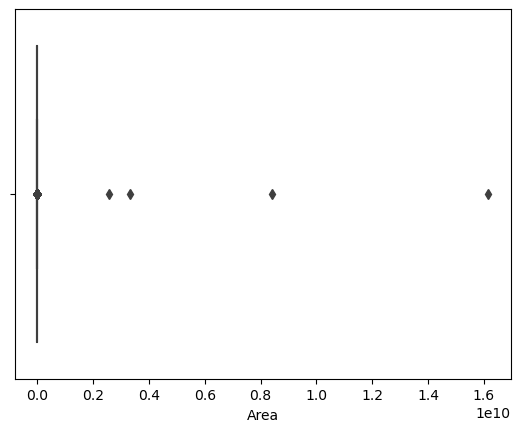

In [23]:
# Melihat Outlier pada data 'Area'
sns.boxplot(x=df['Area'])

<AxesSubplot: xlabel='Price'>

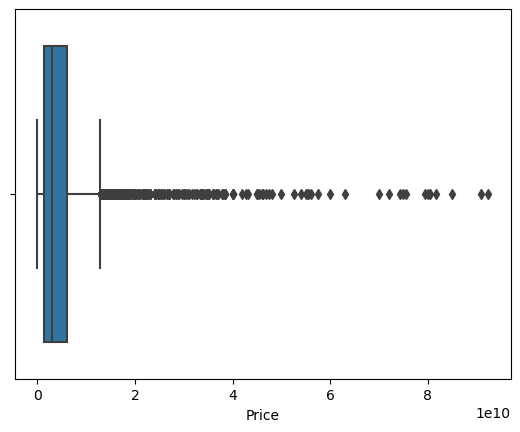

In [24]:
# Melihat Outlier pada data 'Price'
sns.boxplot(x=df['Price'])

Menghapus Data Outlier

In [25]:
# Menghapus data Outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df_clean = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah saya drop outliers
df_clean.shape

C:\Users\Asus\AppData\Local\Temp\ipykernel_10000\3132000213.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_clean = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


(1406, 7)

### Korelasi antar Variabel

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

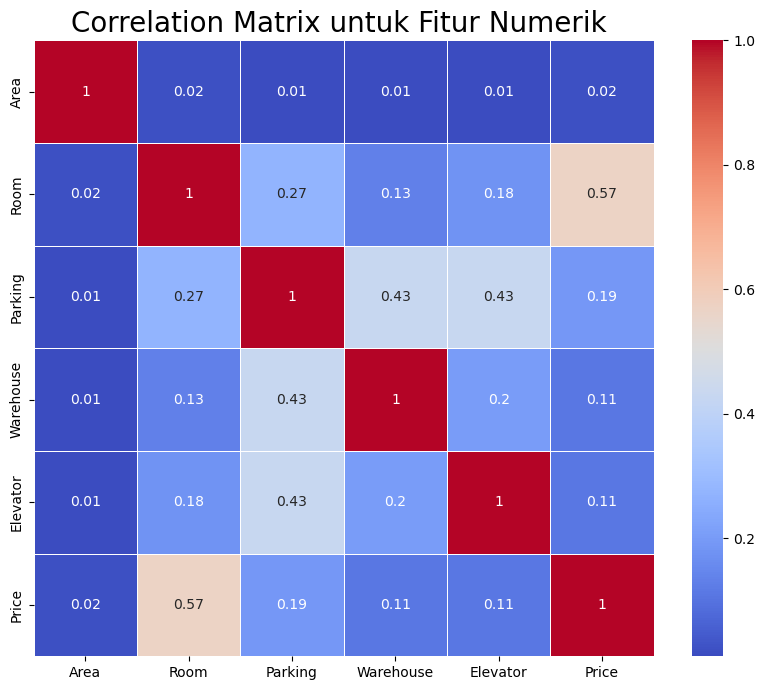

In [26]:
# Melihat kolerasi antar variabel
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

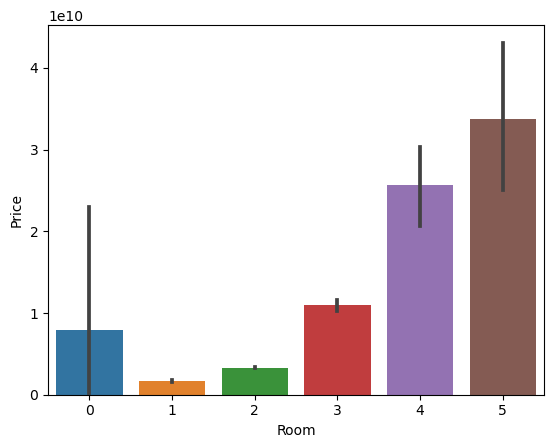

In [27]:
sns.barplot(df_clean, x=df.Room, y=df.Price)
plt.show()

# Data Preparation

### One Hot Encoding

In [28]:
#One Hot Encoding
address_dummy = pd.get_dummies(df_clean['Address'])
df_clean = df.merge(address_dummy, left_index = True, right_index = True)
df_clean.drop(columns = 'Address', inplace = True)
df_clean.head(3)

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Afsarieh,Air force,...,Villa,Water Organization,West Ferdows Boulevard,West Pars,Yaftabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
2,79,2,1,1,1,5.500000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,9.025000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,7.000000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Training dan Testing

In [29]:
# Membagi dataset menjadi data Training dan Testing
from sklearn.model_selection import train_test_split
 
X = df_clean.drop(["Price"],axis =1)
y = df_clean["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1406
Total # of sample in train dataset: 1335
Total # of sample in test dataset: 71


### Normalisasi Dataset

In [30]:
# Normalisasi
from sklearn.preprocessing import StandardScaler

numerical_features = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Area,Room,Parking,Warehouse,Elevator
2112,0.764732,0.0,0.0,0.0,0.0
1388,-1.334898,0.0,0.0,0.0,0.0
1709,-0.395590,0.0,0.0,0.0,0.0
612,1.483027,0.0,0.0,0.0,0.0
376,0.654226,0.0,0.0,0.0,0.0


In [31]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

# Model Development

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
acc = pd.DataFrame(index=['accuracy'])

### KNN

In [33]:
# Pembuatan Model KNN
knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(X_train, y_train)
acc.loc['accuracy', 'knn'] = knn.score(X_test,y_test)
knn.score(X_test,y_test)

0.7486897166445996

### Random Forest

In [34]:
# Pembuatan Model Random Forest
rf = RandomForestRegressor(n_estimators = 50, max_depth = 16, random_state = 11)
rf.fit(X_train, y_train)
acc.loc['accuracy', 'rf'] = rf.score(X_test,y_test)
rf.score(X_test,y_test)

0.5904227756125664

### Boosting

In [35]:
# Pembuatan Model Boosting
boosting = AdaBoostRegressor(n_estimators = 25, learning_rate = 0.001, random_state = 11)                             
boosting.fit(X_train, y_train)
acc.loc['accuracy', 'boosting'] = boosting.score(X_test,y_test)
boosting.score(X_test,y_test)

0.26031704309357706

# Evaluation

### Akurasi 

In [36]:
# Melihat Akurasi dari Setiap Model
acc

,knn,rf,boosting
accuracy,0.74869,0.590423,0.260317


### MSE

In [37]:
# Menghitung Nilai MSE
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','Random Forest','Boosting'])
model_dict = {'KNN': knn, 'Random Forest':rf, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

mse

,train,test
KNN,351670403513108608.0,1015218872957746304.0
Random Forest,971847524945715072.0,1654570288887611904.0
Boosting,3278926614627977216.0,2988099363982731776.0


### Perbandingan Ketiga Model

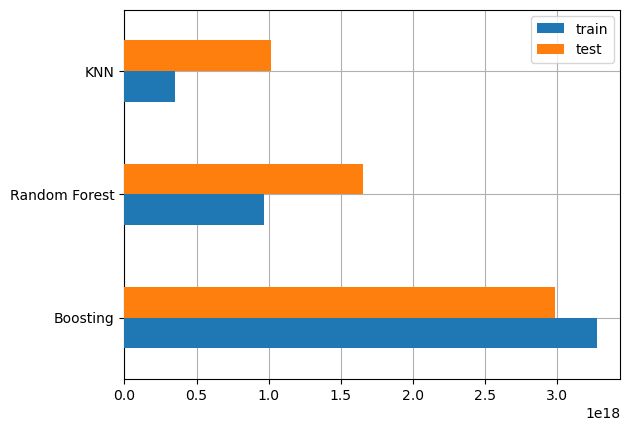

In [38]:
# Perbandingan Ketiga Model
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [39]:
# Melihat Perbandingan dari Ketiga Model
prediksi = X_test.iloc[5:10].copy()
pred_dict = {'y_true':y_test[5:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_Random Forest,prediksi_Boosting
2363,1.100000e+09,8.960000e+08,2.699430e+09,3.115507e+09
906,4.200000e+09,4.600000e+09,5.089435e+09,5.485642e+09
39,4.830000e+09,3.950000e+09,4.755876e+09,5.485642e+09
3440,4.000000e+09,3.600000e+09,3.719135e+09,5.408575e+09
803,3.050000e+09,4.000000e+09,2.853497e+09,3.115507e+09
